# PushShift Reddit Web Scraping

In [1]:
import numpy as np
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

    
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

pd.options.display.max_colwidth = 400
%config InlineBackend.figure_format = 'retina'

## Fetch 10000 posts from Uplifting News with score >= 10 and comments >= 10

In [52]:

url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 500
subreddit = 'UpliftingNews'
start_time = time.time()

params = {
    'subreddit': subreddit,
    'size': 100,
    'score': '>9',
    'num_comments' : '>9',
    'before': round(start_time)
    }

for i in range(loops):
    current_time = time.time()
    
    #requesting data
    res = requests.get(url, params)
    print(f'res {i+1} code: ', res.status_code)
    
    if res.status_code != 200:
        pass
    else:
        data = res.json()
        posts = data['data']
        post_df = pd.DataFrame(posts)
        dfs.append(post_df)
        #get oldest post time and use as before parameter in next request
        oldest = post_df['created_utc'].min()
        params['before'] = oldest

    time.sleep(1)
    
upliftingnews = pd.concat(dfs)

res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  200
res 10 code:  502
res 11 code:  200
res 12 code:  200
res 13 code:  200
res 14 code:  200
res 15 code:  200
res 16 code:  200
res 17 code:  200
res 18 code:  200
res 19 code:  502
res 20 code:  502
res 21 code:  200
res 22 code:  200
res 23 code:  200
res 24 code:  200
res 25 code:  200
res 26 code:  200
res 27 code:  200
res 28 code:  200
res 29 code:  200
res 30 code:  200
res 31 code:  200
res 32 code:  200
res 33 code:  200
res 34 code:  200
res 35 code:  200
res 36 code:  200
res 37 code:  200
res 38 code:  200
res 39 code:  200
res 40 code:  200
res 41 code:  200
res 42 code:  200
res 43 code:  200
res 44 code:  200
res 45 code:  200
res 46 code:  200
res 47 code:  502
res 48 code:  200
res 49 code:  200
res 50 code:  200
res 51 code:  200
res 52 code:  200
res 53 code:  200
res 54 code:  200
res 55 code:  200
res 56 code:  200
r

KeyError: 'created_utc'

In [54]:
# check the oldest post - March 2012
upliftingnews['created_utc'].min()

1337736782

In [57]:
upliftingnews.shape

(10841, 94)

**send the raw file to CSV** 

In [56]:
upliftingnews.to_csv('upliftingnews.csv', index=False)

## Fetch 10000 posts from NottheOnion with score >= 10 and comments >= 10

In [37]:
url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 500
subreddit = 'nottheonion'
start_time = time.time()

params = {
    'subreddit': subreddit,
    'size': 100,
    'score': '>9',
    'num_comments': '>9',
    'before': round(start_time)
}

for i in range(loops):
    current_time = time.time()

    #requesting data
    res = requests.get(url, params)
    print(f'res {i+1} code: ', res.status_code)

    if res.status_code != 200:
        pass
    else:
        data = res.json()
        posts = data['data']
        post_df = pd.DataFrame(posts)
        dfs.append(post_df)
        #get oldest post time and use as before parameter in next request
        oldest = post_df['created_utc'].min()
        params['before'] = oldest

    time.sleep(1)

nottheonion1 = pd.concat(dfs)

res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  502
res 10 code:  200
res 11 code:  200
res 12 code:  200
res 13 code:  200
res 14 code:  200
res 15 code:  200
res 16 code:  200
res 17 code:  200
res 18 code:  200
res 19 code:  200
res 20 code:  200
res 21 code:  200
res 22 code:  200
res 23 code:  200
res 24 code:  200
res 25 code:  200
res 26 code:  200
res 27 code:  200
res 28 code:  200
res 29 code:  200
res 30 code:  200
res 31 code:  200
res 32 code:  200
res 33 code:  200
res 34 code:  200
res 35 code:  200
res 36 code:  200
res 37 code:  200
res 38 code:  200
res 39 code:  200
res 40 code:  200
res 41 code:  200
res 42 code:  200
res 43 code:  200
res 44 code:  200
res 45 code:  200
res 46 code:  200
res 47 code:  200
res 48 code:  200
res 49 code:  200
res 50 code:  200
res 51 code:  200
res 52 code:  200
res 53 code:  200
res 54 code:  200
res 55 code:  200
res 56 code:  200
r

KeyError: 'created_utc'

In [46]:
# check the oldest post - March 2012

nottheonion1['created_utc'].min()

1331490414

**send the raw file to CSV** 

In [55]:
nottheonion1.to_csv('nottheonion.csv', index=False)

# EDA

In [44]:
uplifting = pd.read_csv('upliftingnews.csv')

/Users/alyssiaoh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,4,6,8,9,10,11,12,16,18,19,20,21,22,24,26,27,28,29,30,31,35,37,44,45,46,50,56,59,60,62,63,64,66,68,69,72,73,75,76,79,80,81,82,85,92,93) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [45]:
# drop duplicate posts based on title
uplifting.drop_duplicates(subset=['title'], keep='first', inplace=True, ignore_index=True)

In [46]:
# adding a new column 'datetime' from 'created_utc'
uplifting['datetime'] = pd.to_datetime(uplifting['created_utc'], unit='s')

In [47]:
# check the shape again after dropping duplicates 
uplifting.shape

(10736, 95)

In [48]:
uplifting_df = uplifting[['datetime', 'title', 'score', 'num_comments', 'subreddit']]

In [49]:
uplifting_df = uplifting_df.iloc[0:10736]

In [50]:
uplifting_df.head()

,datetime,title,score,num_comments,subreddit
0,2020-12-19 18:01:37,Anthony Fauci reassures small children with claim to have vaccinated Santa,10,11,UpliftingNews
1,2020-12-19 17:16:47,Anthony Fauci reassures small children with claim to have vaccinated Santa | US news,13,28,UpliftingNews
2,2020-12-19 09:33:05,"Mongolia will pay for electricity, water, heat and garbage collection for all Of Its citizens For Seven Months To Help With COVID-19 Recovery",109,1194,UpliftingNews
3,2020-12-19 07:29:26,Small-business advocate releases free browser plugin that provides local alternatives to products on Amazon &amp; other corporate sites,63,13,UpliftingNews
4,2020-12-19 03:07:28,The Moderna Covid-19 vaccine has been given authorisation for use in the US by the country’s Food and Drug Administration (FDA).,55,13,UpliftingNews


In [51]:
uplifting_df.describe()

,score,num_comments
count,10736.000000,10736.000000
mean,4196.946256,210.374907
std,9377.812461,417.205393
min,10.000000,10.000000
25%,129.000000,17.000000
50%,501.000000,40.000000
75%,3082.000000,207.000000
max,124278.000000,5642.000000


In [52]:
uplifting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10736 entries, 0 to 10735
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10736 non-null  datetime64[ns]
 1   title         10736 non-null  object        
 2   score         10736 non-null  int64         
 3   num_comments  10736 non-null  int64         
 4   subreddit     10736 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 419.5+ KB


In [53]:
uplifting_df.shape

(10736, 5)

In [54]:
nottheonion = pd.read_csv('nottheonion.csv')

/Users/alyssiaoh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,3,4,5,6,8,9,10,11,12,14,15,18,20,21,22,23,24,26,27,28,29,30,31,32,33,37,39,40,41,46,47,48,52,58,61,62,65,66,68,70,71,74,76,78,79,80,81,82,85,88,89,90,92,93,94,95,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:

nottheonion.drop_duplicates(subset=['title'], keep='first', inplace=True, ignore_index=True)

In [56]:
nottheonion['datetime'] = pd.to_datetime(nottheonion['created_utc'], unit='s')

In [57]:
nottheonion.shape

(32204, 103)

In [58]:
nottheonion_df = nottheonion[['datetime', 'title', 'score', 'num_comments', 'subreddit']]

In [59]:
nottheonion_df.describe()

,score,num_comments
count,32204.000000,32204.000000
mean,1601.157030,173.949882
std,5951.063625,520.325434
min,10.000000,10.000000
25%,50.000000,15.000000
50%,130.000000,27.000000
75%,498.250000,80.000000
max,118958.000000,11664.000000


In [60]:
# slice nottheonion df to match the shape of uplifting subreddit df
nottheonion_df = nottheonion_df.iloc[0:10736]

In [61]:
nottheonion_df.shape

(10736, 5)

In [62]:
nottheonion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10736 entries, 0 to 10735
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10736 non-null  datetime64[ns]
 1   title         10736 non-null  object        
 2   score         10736 non-null  int64         
 3   num_comments  10736 non-null  int64         
 4   subreddit     10736 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 419.5+ KB


(0.0, 1000.0)

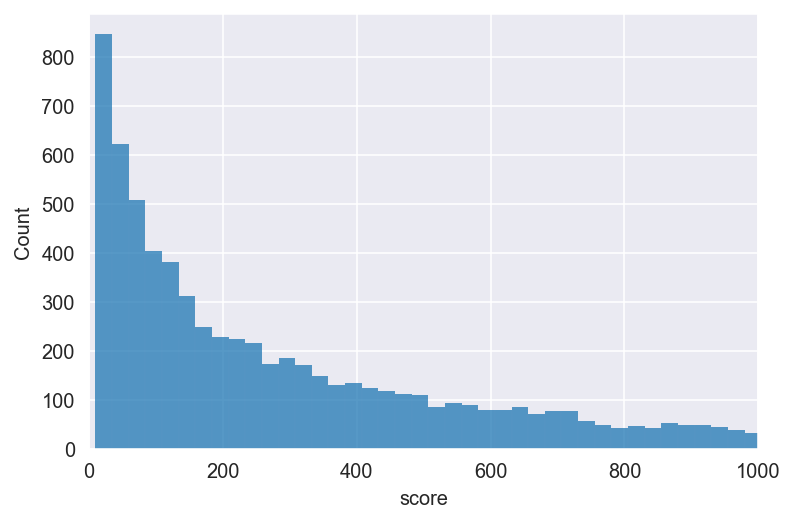

In [236]:
sns.histplot(uplifting_df['score'], bins=5000)
plt.xlim(0, 1000)

(0.0, 1000.0)

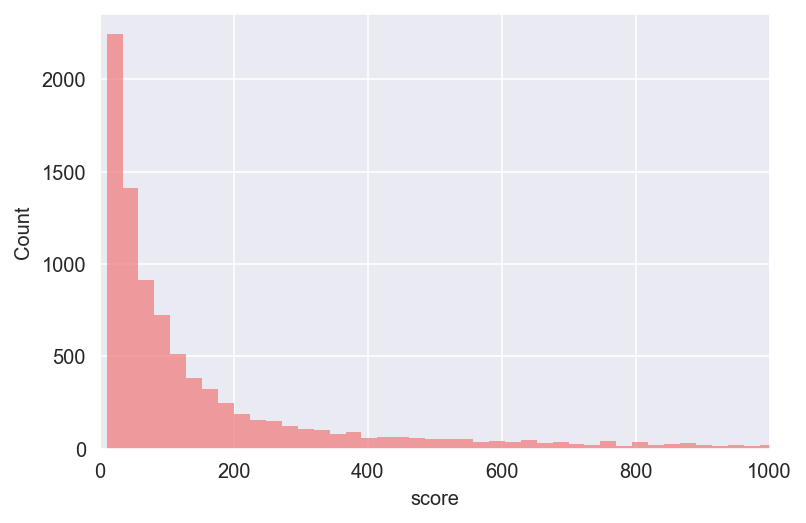

In [303]:
sns.histplot(nottheonion_df['score'], bins=5000, color='lightcoral')
plt.xlim(0, 1000)

In [63]:
uplifting_df['title_len'] = uplifting_df['title'].map(lambda x: len(x))

In [64]:
# 5 longest posts
nottheonion_df['title_len'] = nottheonion_df['title'].map(lambda x: len(x))

<AxesSubplot:xlabel='title_len', ylabel='Count'>

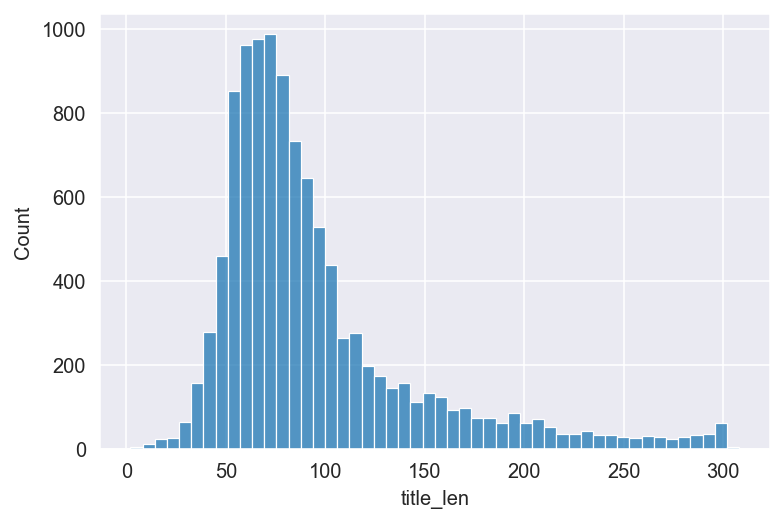

In [269]:
sns.histplot(uplifting_df['title_len'], bins=50)

<AxesSubplot:xlabel='title_len', ylabel='Count'>

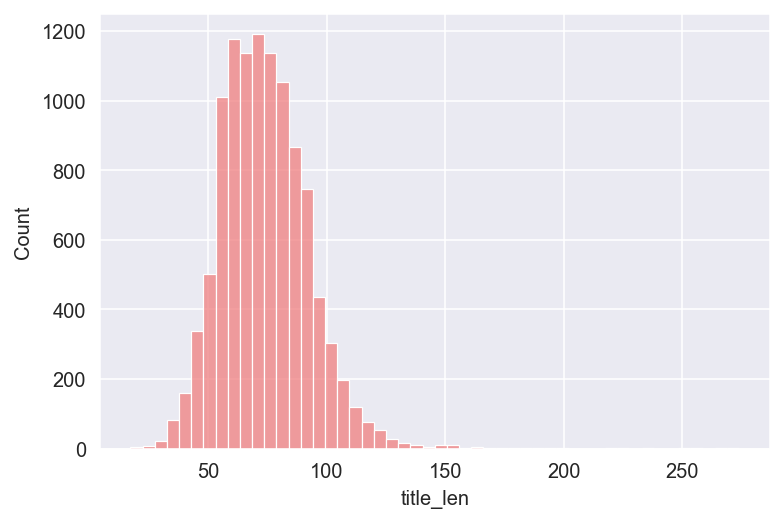

In [304]:
sns.histplot(nottheonion_df['title_len'], bins=50, color='lightcoral')

(0.0, 300.0)

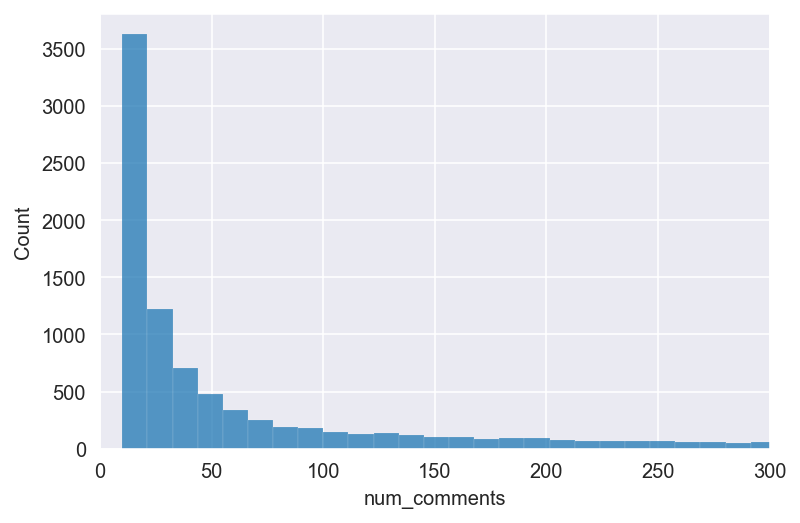

In [276]:
sns.histplot(uplifting_df['num_comments'], bins=500)
plt.xlim(0, 300)

(0.0, 300.0)

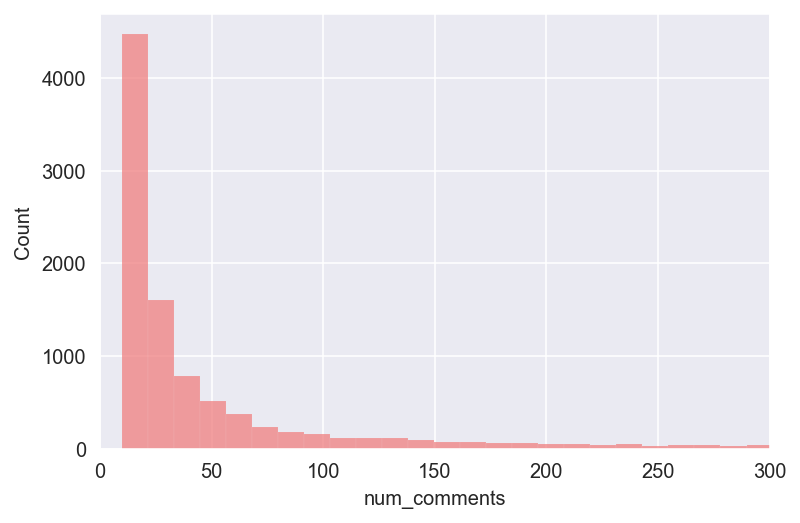

In [305]:
sns.histplot(nottheonion_df['num_comments'], bins=1000, color='lightcoral')
plt.xlim(0, 300)

In [68]:
uplifting_df['title_word_count'] = uplifting_df['title'].apply(lambda x: len(x.split(" ")))
uplifting_df['title_word_count']

0        11
1        14
2        23
3        18
4        21
         ..
10731     5
10732    17
10733     6
10734    10
10735    25
Name: title_word_count, Length: 10736, dtype: int64

In [69]:
nottheonion_df['title_word_count'] = nottheonion_df['title'].apply(lambda x: len(x.split(" ")))
nottheonion_df['title_word_count']

0        11
1         9
2        10
3        11
4        21
         ..
10731    10
10732    12
10733    10
10734    14
10735     9
Name: title_word_count, Length: 10736, dtype: int64

<AxesSubplot:xlabel='title_word_count', ylabel='Count'>

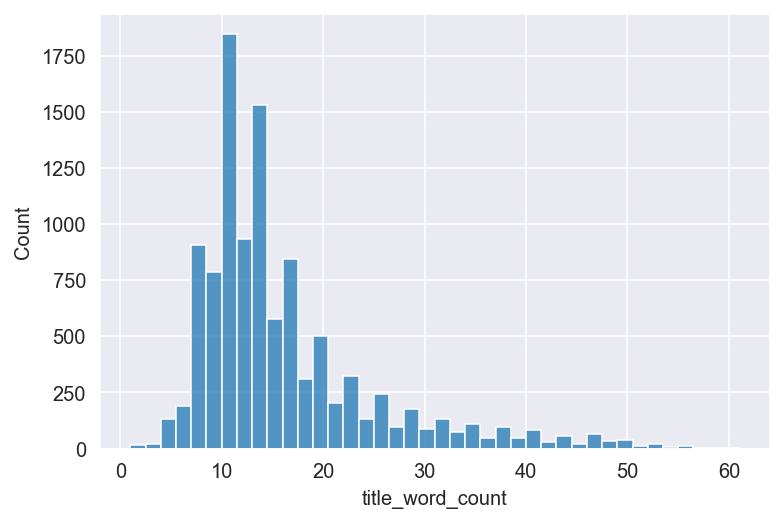

In [311]:
sns.histplot(uplifting_df['title_word_count'], bins=40)

<AxesSubplot:xlabel='title_word_count', ylabel='Count'>

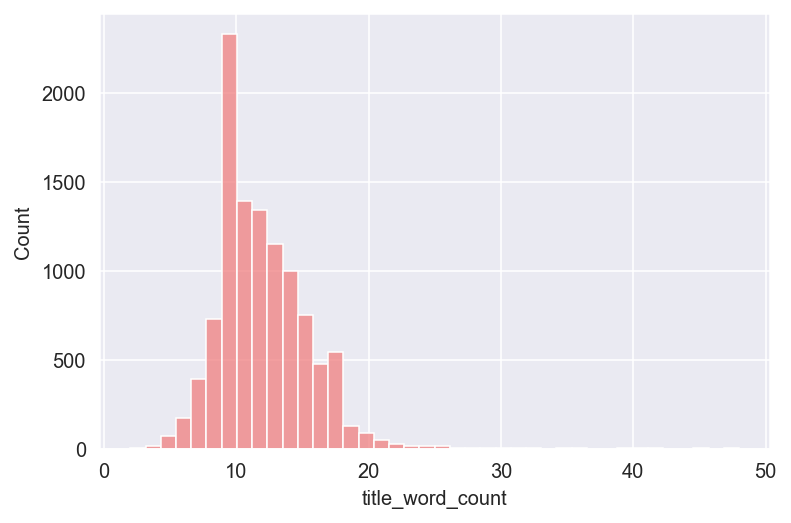

In [310]:
sns.histplot(nottheonion_df['title_word_count'], bins=40, color='lightcoral')

In [71]:
nottheonion_df.to_csv('nottheonion_df.csv', index=False)

In [72]:
uplifting_df.to_csv('uplifting_df.csv', index=False)

# Pre-processing

In [73]:
nottheonion_df.head()

,datetime,title,score,num_comments,subreddit,title_len,title_word_count
0,2020-12-19 16:35:09,Russia trying to send an actress into space before Tom Cruise,10,10,nottheonion,61,11
1,2020-12-19 15:29:24,Canadian man fined for loudly singing Everybody Dance Now,11,23,nottheonion,57,9
2,2020-12-19 14:35:00,Michigan parents must pay after destroying son's $25K porn stash,10,19,nottheonion,64,10
3,2020-12-19 14:05:02,Brazilian President Jair Bolsonaro: COVID-19 Vaccine Can Turn People Into Crocodiles,10,46,nottheonion,84,11
4,2020-12-19 13:32:02,Rubber ducks become a symbol of pro democracy protests in Thailand after being used as protection from teargas and water canons,48,71,nottheonion,127,21


In [74]:


    
def tokenlem(title):
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    
    tokens = [token.lower() for token in tokenizer.tokenize(title)]
   
    out = []
    for token in tokens:
        lem = lemmatizer.lemmatize(token)
        out.append(lem)
        if token != lem:
            print(token, lem)
    return ' '.join(out)

    

In [75]:
nottheonion_df['title'] = nottheonion_df['title'].apply(lambda x: tokenlem(x))
uplifting_df['title'] = uplifting_df['title'].apply(lambda x: tokenlem(x))

parents parent
crocodiles crocodile
ducks duck
protests protest
as a
canons canon
wins win
us u
parents parent
parents parent
says say
snowmen snowman
crocodiles crocodile
takes take
exams exam
as a
says say
mrs mr
children child
cities city
hotspots hotspot
hoops hoop
tests test
gets get
us u
says say
parents parent
encounters encounter
members member
guardians guardian
looks look
gets get
hours hour
covers cover
feet foot
less le
us u
members member
guardians guardian
sues sue
parents parent
cops cop
goes go
hunts hunt
members member
drivers driver
cookies cooky
crocodiles crocodile
parents parent
wants want
its it
rules rule
says say
protests protest
finds find
rules rule
households household
dildos dildo
vaccines vaccine
was wa
blames blame
as a
was wa
as a
gates gate
compares compare
vaccines vaccine
atrocities atrocity
years year
cuts cut
says say
mps mp
media medium
letters letter
trials trial
cases case
as a
as a
sounds sound
chickens chicken
chickens chicken
rules rule
clubs c

outs out
fans fan
restaurants restaurant
crowds crowd
bars bar
was wa
says say
bans ban
boys boy
was wa
faces face
shoots shoot
says say
americans american
fans fan
has ha
words word
its it
products product
cards card
cards card
voices voice
awards award
studies study
students student
was wa
was wa
crashes crash
dupes dupe
attendees attendee
was wa
silencers silencer
drones drone
says say
gates gate
fears fear
earphones earphone
trainers trainer
sues sue
feelings feeling
dungeons dungeon
dragons dragon
races race
stereotypes stereotype
sues sue
streamers streamer
as a
bounties bounty
troops troop
strippers stripper
dancers dancer
republicans republican
plans plan
words word
products product
deputies deputy
crashes crash
says say
as a
us u
abuses abuse
flips flip
pigs pig
says say
calls call
cards card
says say
bedrooms bedroom
has ha
hikers hiker
activists activist
fans fan
bars bar
books book
tests test
orders order
teslas tesla
masks mask
trucks truck
protesters protester
us u
lesson

has ha
goes go
eyeballs eyeball
cvs cv
rejects reject
papers paper
says say
kids kid
less le
tells tell
doughnuts doughnut
jews jew
gets get
books book
years year
orders order
ants ant
separates separate
students student
takes take
eggs egg
rs r
dies dy
wears wear
goes go
eyeballs eyeball
orders order
dogs dog
credits credit
sandwiches sandwich
scenes scene
lines line
movies movie
members member
leads lead
arrests arrest
lines line
scenes scene
films film
customers customer
as a
hacks hack
accounts account
says say
lollipops lollipop
rolls roll
children child
dresses dress
as a
authorities authority
scores score
excuses excuse
students student
shoots shoot
moves move
traders trader
floods flood
gets get
rats rat
cars car
treats treat
ars ar
sculptures sculpture
blades blade
images image
children child
tastes taste
feet foot
officials official
trumps trump
affairs affair
women woman
proves prof
cowboys cowboy
eagles eagle
rings ring
owners owner
laws law
laws law
faces face
years year
a

coins coin
charges charge
friends friend
issues issue
has ha
movies movie
says say
has ha
storms storm
charges charge
authorities authority
pulls pull
fights fight
says say
says say
incidents incident
videos video
says say
does doe
times time
less le
says say
leads lead
says say
teens teen
kids kid
leaders leader
injuries injury
as a
players player
says say
sharks shark
projectiles projectile
ways way
videos video
roofs roof
cops cop
sermons sermon
says say
videos video
rules rule
fans fan
as a
turns turn
locks lock
workers worker
days day
videos video
saints saint
beliefs belief
holes hole
faces face
bans ban
cites cite
calls call
weapons weapon
prayers prayer
checks check
fees fee
cookies cooky
peanuts peanut
uses us
as a
gets get
wants want
thoughts thought
prayers prayer
survivors survivor
fans fan
fixes fix
sues sue
protests protest
debuts debut
lands land
hits hit
firefighters firefighter
projectiles projectile
us u
sues sue
believes belief
was wa
as a
deputies deputy
dui duo
arr

hands hand
chemicals chemical
wants want
flags flag
islands island
microchips microchip
brains brain
taunts taunt
officers officer
fakes fake
alps alp
was wa
phones phone
makes make
burgers burger
was wa
questions question
tweets tweet
republicans republican
questions question
questions question
humans human
calls call
has ha
kids kid
years year
years year
guts gut
was wa
problems problem
doctors doctor
says say
burns burn
officials official
bans ban
colleges college
us u
tweets tweet
tickets ticket
says say
its it
tweets tweet
launches launch
consoles console
sparks spark
mourners mourner
houses house
farmers farmer
bottles bottle
has ha
farmers farmer
fights fight
gets get
accidents accident
says say
as a
breaks break
offenders offender
executives executive
fans fan
feet foot
lawmakers lawmaker
criminals criminal
says say
rewrites rewrite
researchers researcher
clashes clash
says say
upsets upset
says say
was wa
priests priest
children child
us u
rules rule
airlines airline
horses ho

stands stand
drugs drug
gators gator
children child
as a
walks walk
penguins penguin
gives give
lbs lb
arms arm
does doe
arms arm
finds find
kids kid
pulls pull
children child
hits hit
trolls troll
rs r
pounds pound
ounces ounce
says say
was wa
pounds pound
ounces ounce
cups cup
republicans republican
has ha
its it
says say
protesters protester
devices device
parks park
photographers photographer
decades decade
earls earl
goes go
claims claim
nachos nacho
children child
kids kid
steals steal
says say
buddies buddy
claims claim
massages massage
injections injection
calls call
nachos nacho
accounts account
returns return
says say
teams team
sports sport
climbs climb
patients patient
hospitals hospital
thousands thousand
aliens alien
schools school
parents parent
vaccinations vaccination
agents agent
kids kid
was wa
dates date
was wa
as a
turns turn
was wa
lines line
wants want
says say
was wa
prisoners prisoner
keys key
as a
rejects reject
photos photo
uses us
powers power
devotees devot

parents parent
was wa
hates hate
its it
says say
barriers barrier
operators operator
claims claim
as a
sues sue
attacks attack
has ha
numbers number
weddings wedding
bets bet
wins win
tests test
mars mar
bans ban
videos video
trucks truck
thieves thief
says say
jets jet
flights flight
items item
renovations renovation
says say
parents parent
gets get
posts post
releases release
its it
hooters hooter
boobs boob
americans american
women woman
abortions abortion
plans plan
hands hand
says say
neighbors neighbor
costs cost
sparks spark
heels heel
says say
numbers number
makes make
tickets ticket
drivers driver
shortages shortage
says say
states state
sweepers sweeper
blocks block
buys buy
was wa
bans ban
regions region
calls call
runs run
shells shell
cops cop
shootings shooting
citizens citizen
thieves thief
has ha
hangs hang
flies fly
says say
researchers researcher
protesters protester
protections protection
its it
stores store
years year
spins spin
teams team
connotations connotation
n

dummies dummy
us u
years year
owners owner
blames blame
sales sale
packs pack
was wa
machines machine
guards guard
urges urge
hairdressers hairdresser
steals steal
thousands thousand
dollars dollar
workers worker
voters voter
fingers finger
cats cat
birds bird
says say
parks park
finds find
claims claim
says say
kids kid
says say
as a
tendencies tendency
potholes pothole
prisons prison
machines machine
tensions tension
beaches beach
aliens alien
humans human
wins win
was wa
airlines airline
ways way
passengers passenger
strikes strike
feasts feast
meals meal
burglars burglar
lawmakers lawmaker
sales sale
glues glue
cases case
capricorns capricorn
years year
guys guy
producers producer
contestants contestant
riots riot
defeats defeat
millions million
cats cat
sausages sausage
gets get
thinks think
was wa
says say
cases case
bans ban
rollers roller
caps cap
pajamas pajama
parents parent
escapes escape
years year
parties party
years year
as a
ships ship
mothers mother
says say
cats cat
sa

as a
extras extra
pulls pull
promises promise
jokes joke
says say
friends friend
attacks attack
as a
refuses refuse
parents parent
savings saving
strangers stranger
gets get
eyes eye
says say
officials official
aliens alien
heights height
us u
hours hour
customs custom
says say
comments comment
adams adam
releases release
its it
dies dy
teachers teacher
guns gun
sheriffs sheriff
bans ban
babies baby
votes vote
cities city
bags bag
straws straw
teachers teacher
pellets pellet
drugs drug
jeans jean
turns turn
removals removal
parents parent
requests request
views view
reports report
refuses refuse
says say
drugs drug
jets jet
features feature
growers grower
pets pet
was wa
students student
desks desk
passes pass
stands stand
children child
astronauts astronaut
vaccinations vaccination
contracts contract
tells tell
visitors visitor
tracks track
teachers teacher
nooses noose
as a
necklaces necklace
parents parent
calls call
professionals professional
snakes snake
demands demand
sues sue
cl

says say
was wa
zeroes zero
students student
prisons prison
tampons tampon
visitors visitor
was wa
woods wood
prisons prison
dentures denture
inmates inmate
mistakes mistake
children child
plates plate
as a
mistakes mistake
flyers flyer
sparks spark
calls call
bananas banana
was wa
writers writer
us u
texans texan
fans fan
playlists playlist
gets get
watchers watcher
drops drop
pets pet
animals animal
balls ball
goes go
pains pain
as a
animals animal
students student
stamps stamp
pulls pull
whips whip
years year
mars mar
students student
ballots ballot
stamps stamp
rules rule
bananas banana
authorities authority
calendars calendar
residents resident
concerns concern
prostitutes prostitute
children child
sells sell
shoes shoe
breaks break
says say
regrets regret
runs run
blames blame
women woman
media medium
was wa
bursts burst
flames flame
responders responder
offers offer
students student
says say
allegations allegation
wales wale
runs run
authorities authority
pulls pull
siblings sib

us u
terms term
games game
wolves wolf
claims claim
kills kill
relatives relative
turkeys turkey
wasps wasp
experts expert
steals steal
crashes crash
dies dy
says say
accusers accuser
trains train
crows crow
payments payment
awards award
staffers staffer
reporters reporter
cubs cub
women woman
strategies strategy
takes take
gets get
requests request
tips tip
cows cow
beaches beach
reports report
items item
emirates emirate
voters voter
years year
votes vote
dui duo
tells tell
needs need
cops cop
rejects reject
rights right
thinks think
was wa
chairs chair
aims aim
rigs rig
phones phone
hopes hope
subscribers subscriber
less le
blames blame
rights right
dui duo
claims claim
tells tell
was wa
votes vote
disasters disaster
expresses express
balloons balloon
posts post
employees employee
times time
rangers ranger
fans fan
cops cop
was wa
years year
says say
residents resident
leaves leaf
children child
floods flood
tears tear
as a
actors actor
chainsaws chainsaw
movies movie
blames blame
d

pens pen
dealers dealer
says say
philippines philippine
branches branch
says say
has ha
republicans republican
families family
says say
bankrupts bankrupt
weeks week
players player
shirts shirt
was wa
dies dy
celebrations celebration
as a
turns turn
uses us
fears fear
thousands thousand
hippies hippy
falls fall
pallbearers pallbearer
kills kill
credits credit
was wa
puts put
festivals festival
tries try
remarks remark
researchers researcher
was wa
screwdrivers screwdriver
tells tell
parents parent
knocks knock
items item
plays play
parents parent
breaks break
experts expert
firearms firearm
claims claim
wins win
leaders leader
shoots shoot
testicles testicle
tries try
teens teen
less le
drugs drug
less le
as a
sues sue
terms term
as a
fans fan
chickens chicken
sessions session
cites cite
families family
blames blame
parents parent
sessions session
cites cite
policies policy
separations separation
says say
kids kid
claims claim
sprouts sprout
hours hour
robbers robber
bans ban
neighbour

us u
signs sign
decisions decision
signs sign
runs run
finishes finish
kids kid
levels level
neighbors neighbor
parties party
buses bus
youths youth
gives give
hosts host
says say
shears shear
reports report
years year
gets get
years year
years year
rules rule
puts put
books book
christians christian
years year
removes remove
isis isi
calls call
bans ban
says say
hopes hope
avengers avenger
compares compare
sequels sequel
demands demand
kids kid
steals steal
goes go
says say
detectives detective
parents parent
leads lead
lines line
feds fed
pieces piece
pods pod
pupils pupil
aspects aspect
finds find
months month
students student
aspects aspect
gives give
leaves leaf
months month
teens teen
months month
as a
dogs dog
perks perk
passes pass
gains gain
years year
goes go
claims claim
tastes taste
looks look
students student
aspects aspect
gets get
callers caller
nuts nut
taxpayers taxpayer
governors governor
wins win
effects effect
students student
was wa
posts post
kids kid
stays stay
m

moves move
guns gun
schools school
offers offer
implants implant
honors honor
gives give
days day
prosecutors prosecutor
shoots shoot
days day
says say
opens open
tests test
fakes fake
cheeseburgers cheeseburger
was wa
serves serf
gets get
drivers driver
was wa
owners owner
fires fire
sets set
costs cost
us u
has ha
drinks drink
shots shot
investigators investigator
raises raise
concerns concern
movies movie
decades decade
15s 15
tries try
plans plan
rifles rifle
associates associate
dancers dancer
residents resident
removes remove
feds fed
refuses refuse
sues sue
charges charge
antidepressants antidepressant
finds find
children child
hands hand
depressants depressant
finds find
us u
blows blow
claims claim
shooters shooter
democrats democrat
drinks drink
schools school
legislators legislator
marriages marriage
marriages marriage
declines decline
rifles rifle
calls call
couples couple
rifles rifle
shoots shoot
weapons weapon
mars mar
weddings wedding
as a
dies dy
lawmakers lawmaker
has

bees bee
cops cop
problems problem
doctors doctor
reports report
us u
comments comment
as a
us u
words word
as a
invites invite
countries country
us u
agents agent
pounds pound
bundles bundle
pros pro
cons con
dogs dog
diets diet
cops cop
pounds pound
was wa
presents present
as a
weeks week
sucks suck
faces face
bells bell
lawmakers lawmaker
guns gun
signs sign
studies study
makes make
planes plane
takes take
bashes bash
wars war
women woman
ends end
as a
triples triple
soars soar
its it
as a
paedophiles paedophile
typos typo
warrants warrant
removes remove
kits kit
makes make
has ha
lifts lift
viruses virus
hits hit
pirates pirate
boxes box
intruders intruder
registers register
trees tree
pulls pull
orgies orgy
dolphins dolphin
scientists scientist
finds find
women woman
grandmasters grandmaster
looks look
has ha
gets get
avocados avocado
injuries injury
its it
pies pie
aficionados aficionado
appeals appeal
ashes ash
poses pose
friends friend
years year
wants want
panthers panther
lau

gives give
antibodies antibody
patients patient
spreads spread
businesses business
sales sale
students student
gets get
hawks hawk
elections election
bans ban
hundreds hundred
fits fit
issues issue
requests request
bans ban
days day
bans ban
concerns concern
us u
strikes strike
abortions abortion
as a
strikes strike
gives give
tears tear
residents resident
twins twin
us u
passes pass
drops drop
donations donation
was wa
has ha
feds fed
skills skill
degrees degree
jobs job
projects project
produces produce
antibodies antibody
hospitals hospital
prices price
times time
vehicles vehicle
shows show
says say
passes pass
rights right
voters voter
chefs chef
gives give
us u
has ha
basics basic
has ha
inmates inmate
us u
honeybees honeybee
shows show
has ha
drivers driver
stylists stylist
masks mask
clients client
comes come
years year
views view
cancels cancel
plans plan
has ha
cases case
results result
tests test
laboratories laboratory
graduates graduate
works work
lives life
was wa
has ha


churches church
las la
vegas vega
tickets ticket
years year
women woman
asses ass
poachers poacher
bullies bully
was wa
sightings sighting
pass pas
days day
makes make
prices price
peoples people
students student
buys buy
us u
rights right
deaths death
festivals festival
offers offer
grounds ground
firefighters firefighter
nails nail
was wa
states state
peoples people
laws law
children child
sales sale
practices practice
animals animal
circuses circus
wipes wipe
times time
schools school
pays pay
debts debt
schools school
protesters protester
roads road
us u
pass pas
johns john
plants plant
trees tree
panels panel
plants plant
stations station
researchers researcher
molecules molecule
products product
ways way
emissions emission
says say
as a
as a
takes take
leaders leader
buys buy
fills fill
supplies supply
students student
has ha
us u
years year
miles mile
pays pay
mammograms mammogram
capitals capital
cities city
mayors mayor
turns turn
mushrooms mushroom
minutes minute
sanders sand

atoms atom
engines engine
launches launch
emissions emission
plants plant
trees tree
has ha
seconds second
shelters shelter
records record
statistics statistic
bans ban
companies company
injectors injector
kids kid
mandates mandate
eggs egg
turns turn
tonnes tonne
threats threat
tracks track
uses us
years year
adds add
offers offer
employees employee
bottles bottle
leads lead
children child
books book
cosmetics cosmetic
surprises surprise
victims victim
families family
makes make
years year
does doe
finds find
animals animal
deaths death
firearms firearm
protests protest
elections election
sweeps sweep
muslims muslim
churches church
philippines philippine
has ha
plans plan
bags bag
biles bile
makes make
us u
women woman
bergs berg
starts start
populations population
takes take
saves save
raises raise
needs need
gets get
goes go
troopers trooper
melts melt
guns gun
makes make
shovels shovel
trees tree
days day
times time
democracies democracy
classrooms classroom
attacks attack
victims 

hugs hug
kids kid
parents parent
kids kid
us u
plaintiffs plaintiff
us u
activists activist
beaches beach
backyards backyard
bans ban
has ha
fuels fuel
numbers number
whales whale
shores shore
waters water
numbers number
years year
has ha
its it
days day
vessels vessel
guards guard
says say
us u
states state
its it
countries country
robots robot
has ha
has ha
its it
illnesses illness
folks folk
weeks week
has ha
its it
plants plant
signs sign
pays pay
millions million
dollars dollar
bills bill
thousands thousand
strings string
donors donor
girls girl
mosquitos mosquito
thrones throne
parks park
statues statue
grounds ground
risks risk
sales sale
bucks buck
has ha
countries country
plants plant
beaches beach
has ha
debts debt
seniors senior
farmers farmer
removes remove
books book
cures cure
conditions condition
worlds world
months month
ounces ounce
grams gram
as a
as a
clues clue
cutouts cutout
memes meme
hides hide
folks folk
says say
makes make
media medium
signs sign
generations ge

projects project
kansas kansa
its it
helps help
fathers father
periods period
daughters daughter
has ha
victims victim
victims victim
victims victim
victims victim
joins join
imports import
shows show
countries country
as a
grounds ground
adults adult
donors donor
has ha
children child
40s 40
thousands thousand
trees tree
months month
hours hour
victims victim
lawmakers lawmaker
plastics plastic
plastics plastic
bottles bottle
utensils utensil
straws straw
businesses business
jails jail
prisons prison
muslims muslim
synagogues synagogue
breaks break
substances substance
antivirals antiviral
gives give
students student
aboriginals aboriginal
billions billion
states state
votes vote
years year
grants grant
makes make
shares share
activities activity
teens teen
students student
years year
rates rate
rhinos rhino
elephants elephant
years year
was wa
removes remove
books book
cures cure
was wa
was wa
owners owner
colleges college
children child
turtles turtle
scientists scientist
cities cit

cigarettes cigarette
finds find
appeals appeal
rules rule
braids braid
graduates graduate
firms firm
operations operation
days day
hospitals hospital
circumcisions circumcision
rules rule
saves save
fathers father
neighbors neighbor
says say
filters filter
homes home
notes note
years year
has ha
years year
friends friend
pets pet
dozens dozen
businesses business
pounds pound
days day
pledges pledge
homes home
says say
filters filter
homes home
drops drop
its it
emissions emission
levels level
parents parent
as a
funds fund
sheriffs sheriff
pockets pocket
was wa
wipes wipe
mosquitoes mosquito
villagers villager
wales wale
boys boy
depths depth
seeks seek
gives give
women woman
years year
straws straw
stores store
was wa
drops drop
returns return
straws straw
leaders leader
countries country
has ha
jews jew
christians christian
muslims muslim
attendants attendant
stops stop
children child
boys boy
caves cave
boys boy
weeks week
reports report
buys buy
drops drop
teens teen
uses us
cops c

parents parent
makes make
eyes eye
rescues rescue
conditions condition
decades decade
students student
rules rule
was wa
as a
awards award
plays play
minutes minute
weeks week
victims victim
individuals individual
hatchlings hatchling
species specie
decades decade
was wa
years year
turtles turtle
nests nest
wins win
us u
wishes wish
builds build
homes home
families family
therapists therapist
buys buy
wins win
protesters protester
meals meal
days day
suggestions suggestion
benefits benefit
employees employee
folks folk
trails trail
levels level
researchers researcher
months month
says say
moves move
mice mouse
trials trial
houses house
hours hour
turns turn
lives life
says say
has ha
bears bear
woods wood
years year
makes make
avengers avenger
scientists scientist
mice mouse
hopes hope
letters letter
sharks shark
rays ray
moves move
veterans veteran
tracks track
has ha
years year
has ha
disabilities disability
computers computer
years year
releases release
partners partner
sets set
pen

its it
elephants elephant
victims victim
parents parent
as a
children child
as a
years year
needs need
wheelchairs wheelchair
miles mile
comes come
as a
women woman
makes make
its it
as a
closes close
sites site
toilets toilet
villages village
areas area
standards standard
scientists scientist
veterans veteran
sisters sister
traffickers trafficker
children child
gets get
flowers flower
years year
pays pay
items item
toys toy
us u
dogs dog
gives give
as a
ticks tick
was wa
dances dance
raises raise
has ha
rays ray
whales whale
turtles turtle
dozens dozen
species specie
does doe
saves save
pays pay
toys toy
toys toy
tots tot
donations donation
wins win
pounds pound
raises raise
has ha
makes make
runs run
days day
was wa
times time
has ha
films film
reports report
was wa
meets meet
does doe
offers offer
fines fine
rules rule
rescues rescue
coles cole
supermarkets supermarket
announcements announcement
children child
challenges challenge
rescues rescue
sets set
injustices injustice
was wa


kittens kitten
years year
says say
takes take
builds build
apartments apartment
helps help
predators predator
messages message
builds build
needs need
lives life
burns burn
as a
friends friend
users user
marks mark
lives life
gets get
plans plan
corners corner
delights delight
buys buy
its it
doors door
hopes hope
neurologists neurologist
rituals ritual
emotions emotion
decisions decision
goes go
stays stay
issues issue
has ha
has ha
months month
pills pill
demons demon
as a
nations nation
himalayas himalaya
catches catch
pushes push
women woman
bikinis bikini
charges charge
securities security
has ha
securities security
faces face
years year
icelanders icelander
employees employee
floods flood
us u
buys buy
plans plan
parks park
corps corp
cadets cadet
donors donor
saves save
thousands thousand
hits hit
passes pass
removes remove
benefits benefit
parents parent
children child
lifts lift
rates rate
us u
saves save
fleas flea
offers offer
breaks break
records record
refugees refugee
mak

urges urge
workers worker
changes change
trials trial
muslims muslim
victims victim
youths youth
was wa
has ha
boys boy
as a
boys boy
as a
walks walk
philippines philippine
years year
wants want
was wa
years year
things thing
monkeys monkey
days day
things thing
kids kid
sells sell
drawings drawing
toys toy
ads ad
pictures picture
cats cat
raises raise
victims victim
employees employee
days day
years year
falls fall
years year
gets get
as a
surprises surprise
flowers flower
stops stop
talks talk
teens teen
hands hand
cigarettes cigarette
husbands husband
ingredients ingredient
says say
returns return
days day
babies baby
norwegians norwegian
blessings blessing
cvs cv
cigarettes cigarette
stores store
years year
sales sale
customers customer
years year
nations nation
complainants complainant
teaches teach
lives life
students student
was wa
finalists finalist
nominations nomination
applications application
countries country
jumps jump
wins win
winnings winning
parents parent
victims vict

gallons gallon
dies dy
arabs arab
jews jew
buys buy
gives give
waits wait
minutes minute
has ha
stories story
limbs limb
children child
wipes wipe
girls girl
gives give
pounds pound
pays pay
brides bride
was wa
serves serf
meals meal
hundreds hundred
as a
has ha
wins win
pooches pooch
muslims muslim
christians christian
raises raise
was wa
as a
has ha
presents present
soldiers soldier
christians christian
headlines headline
days day
was wa
buys buy
years year
moments moment
hands hand
tips tip
holidays holiday
has ha
jobs job
employees employee
gets get
terrorists terrorist
opens open
raises raise
hours hour
kids kid
plans plan
its it
children child
has ha
vaccines vaccine
diseases disease
children child
sessions session
leaves leaf
hugs hug
has ha
racists racist
friends friend
views view
grants grant
inmates inmate
bans ban
crying cry
pulls pull
ends end
pounds pound
looks look
gets get
skateboarders skateboarder
kennels kennel
adoptions adoption
buys buy
was wa
americans american
acr

years year
detectors detector
items item
wars war
strangers stranger
was wa
teens teen
books book
was wa
homes home
flags flag
finds find
years year
keeps keep
as a
forces force
belongings belonging
finds find
years year
streets street
as a
runners runner
minutes minute
seconds second
pays pay
supplies supply
its it
fans fan
reaches reach
drops drop
children child
neighbors neighbor
messages message
sees see
jobs job
was wa
years year
years year
operations operation
forests forest
tattoos tattoo
cardinals cardinal
innings inning
birds bird
babies baby
buys buy
guards guard
claims claim
disasters disaster
gays gay
prisons prison
firefighters firefighter
miles mile
proportions proportion
pups pup
forms form
pesticides pesticide
nurseries nursery
shows show
saves save
feeds feed
helps help
was wa
years year
eyes eye
knees knee
goes go
years year
gets get
goes go
runners runner
women woman
years year
helps help
leaves leaf
takes take
supplies supply
as a
was wa
efforts effort
daughters dau

as a
sees see
glasses glass
books book
has ha
states state
kansas kansa
months month
congregants congregant
as a
actions action
was wa
members member
authorities authority
leads lead
gifts gift
cards card
shows show
muslims muslim
offers offer
scars scar
populations population
schools school
has ha
its it
leaders leader
weights weight
rallies rally
bans ban
brooms broom
scientists scientist
stands stand
advocates advocate
animals animal
thousands thousand
followers follower
has ha
homes home
has ha
its it
feet foot
ranges range
animals animal
cats cat
dogs dog
homes home
saves save
scouts scout
shots shot
lives life
cats cat
gates gate
sidelines sideline
talks talk
gates gate
has ha
years year
knows know
years year
friends friend
families family
was wa
experiences experience
graduates graduate
classes class
bans ban
animals animal
circuses circus
eateries eatery
offenders offender
hours hour
graduates graduate
customers customer
overs over
refuses refuse
graders grader
things thing
tur

students student
breaks break
kittens kitten
dances dance
years year
years year
years year
travels travel
miles mile
months month
slaps slap
marines marine
dogs dog
years year
branches branch
trees tree
edibles edible
streets street
sidewalks sidewalk
invites invite
calls call
calls call
radios radio
members member
pbs pb
clings cling
was wa
was wa
victims victim
als al
eyes eye
uses us
respirators respirator
als al
patients patient
years year
sharks shark
fins fin
jews jew
arabs arab
buys buy
as a
problems problem
gets get
saves save
legs leg
saves save
queens queen
jumps jump
smashes smash
officers officer
women woman
screenings screening
wishes wish
charms charm
boxes box
saves save
children child
gets get
as a
was wa
has ha
photos photo
goes go
airlines airline
removes remove
was wa
puts put
as a
as a
stories story
us u
studies study
humans human
damages damage
takes take
minutes minute
gets get
women woman
uncles uncle
classes class
rushes rush
disorders disorder
children child
tr

has ha
was wa
groceries grocery
dads dad
goes go
plays play
kids kid
goes go
says say
officers officer
wants want
women woman
wants want
its it
weeks week
cops cop
addicts addict
woods wood
as a
sees see
years year
times time
was wa
as a
teens teen
homes home
kms km
days day
years year
tells tell
calls call
takes take
takes take
muslims muslim
options option
kids kid
wheelchairs wheelchair
pays pay
as a
launches launch
says say
gives give
euros euro
turns turn
was wa
events event
saves save
was wa
miles mile
invites invite
surprises surprise
mates mate
orders order
wheels wheel
israelis israeli
palestinians palestinian
tears tear
lets let
saves save
children child
children child
finds find
was wa
shows show
animals animal
preservatives preservative
additives additive
ingredients ingredient
skiers skier
skiers skier
researchers researcher
has ha
turns turn
farms farm
sees see
dolls doll
its it
lights light
birds bird
buildings building
as a
as a
birds bird
pulls pull
makes make
crowns c

bruins bruin
teams team
as a
characters character
children child
studies study
gets get
as a
years year
as a
millions million
media medium
years year
deals deal
as a
cancels cancel
residents resident
messages message
was wa
months month
was wa
was wa
desks desk
bicycles bicycle
scores score
lives life
employees employee
artisans artisan
engineers engineer
as a
lights light
attacks attack
citizens citizen
workers worker
days day
flushes flush
bengals bengal
has ha
needs need
lunches lunch
kids kid
kansas kansa
tracks track
tickets ticket
gets get
tickets ticket
takes take
walks walk
rescues rescue
has ha
visits visit
has ha
rescues rescue
dragons dragon
skips skip
kids kid
children child
was wa
relatives relative
oceans ocean
weeks week
years year
volunteers volunteer
victims victim
lives life
years year
bags bag
has ha
has ha
years year
puts put
strangers stranger
strangers stranger
strangers stranger
sees see
years year
has ha
sandwiches sandwich
rallies rally
schoolmates schoolmate
e

returns return
rewards reward
finds find
cubs cub
gates gate
las la
vegas vega
finds find
was wa
scouts scout
clerks clerk
lunches lunch
marriages marriage
comments comment
was wa
turns turn
gates gate
saves save
lives life
comes come
donations donation
nurses nurse
heroes hero
years year
gets get
nurses nurse
wins win
animals animal
gives give
lunches lunch
children child
days day
puts put
pays pay
orders order
shares share
winnings winning
charities charity
gets get
muslims muslim
philippines philippine
kids kid
kings king
hoops hoop
goes go
shoots shoot
hoops hoop
months month
wins win
gives give
was wa
gives give
needs need
finds find
passengers passenger
leaves leaf
presents present
tries try
hundreds hundred
as a
gives give
goes go
drives drive
us u
thousands thousand
crushes crush
trucks truck
takes take
beheadings beheading
years year
months month
comments comment
years year
was wa
employees employee
boots boot
samaritans samaritan
contacts contact
gets get
months month
walks w

firefighters firefighter
years year
videos video
lives life
teens teen
us u
pays pay
goods good
finds find
feeds feed
saves save
makes make
has ha
freeways freeway
years year
saves save
donations donation
as a
pictures picture
arms arm
gets get
as a
closes close
tissues tissue
falls fall
drops drop
as a
blows blow
gets get
gets get
bullies bully
gets get
studios studio
aids aid
years year
gets get


In [77]:
nottheonion_df.head(5)

,datetime,title,score,num_comments,subreddit,title_len,title_word_count
0,2020-12-19 16:35:09,russia trying to send an actress into space before tom cruise,10,10,nottheonion,61,11
1,2020-12-19 15:29:24,canadian man fined for loudly singing everybody dance now,11,23,nottheonion,57,9
2,2020-12-19 14:35:00,michigan parent must pay after destroying son s 25k porn stash,10,19,nottheonion,64,10
3,2020-12-19 14:05:02,brazilian president jair bolsonaro covid 19 vaccine can turn people into crocodile,10,46,nottheonion,84,11
4,2020-12-19 13:32:02,rubber duck become a symbol of pro democracy protest in thailand after being used a protection from teargas and water canon,48,71,nottheonion,127,21


In [78]:
cv = CountVectorizer(stop_words='english', min_df=2)
cv.fit(nottheonion_df['title'])

ntotitle_cv = cv.transform(nottheonion_df['title'])
ntotitle_df = pd.DataFrame(ntotitle_cv.todense(), columns=cv.get_feature_names())




In [79]:
ntotitle_df.sum().sort_values(ascending=False).head(50)

man         1202
say         1120
woman        722
police       696
year         499
wa           407
new          397
school       362
people       302
sex          279
old          267
arrested     247
child        242
student      240
ha           216
gun          211
car          209
stop         194
black        188
home         187
000          186
day          185
white        185
claim        181
world        177
want         173
dog          169
ban          168
state        167
officer      164
make         163
cop          161
report       160
court        155
house        153
drug         152
accused      151
texas        149
men          145
florida      144
study        144
city         141
million      137
shooting     133
family       131
death        130
game         130
teen         130
time         130
like         128
dtype: int64

In [80]:
[title for title in nottheonion_df['title'] if 'accused' in title][:10]

['accused dead voter is alive and speaking out',
 'police accused porch pirate arrested when he show up at court in same shirt from surveillance pic',
 'the spanish family wrongly accused of child pornography due to a mistake reading a date',
 'woman accused of murder for hire plot against ex husband went to rent a hitman website',
 'ex officer accused of human right crime in argentina found living in berlin',
 'man allegedly linked to boogaloo movement accused of taking homemade machine gun to protest to kill cop',
 'officer who accused mcdonald s worker of taking a bite of his sandwich forgot he ate it',
 'officer who knelt with george floyd protester accused of insubordination a day later the san francisco examiner',
 'who accused of carrying china s water after official refuse to acknowledge taiwan during bizarre interview',
 'man accused of skinning dog to make doggy coat wa formerly charged with step father s murder']

In [81]:
cv = CountVectorizer(stop_words='english', min_df=2)
cv.fit(uplifting_df['title'])

uptitle_cv = cv.transform(uplifting_df['title'])
uptitle_df = pd.DataFrame(uptitle_cv.todense(), columns=cv.get_feature_names())


In [82]:
uptitle_df.sum().sort_values(ascending=False).head(50)

year        1587
man          855
old          836
woman        689
ha           659
new          627
dog          617
000          581
wa           556
school       494
life         470
boy          460
help         453
girl         448
day          435
million      412
child        410
people       400
save         392
free         387
world        357
family       353
time         353
homeless     341
home         337
student      330
police       291
make         274
say          270
ban          261
cancer       260
just         257
kid          254
100          243
pay          240
teen         235
car          230
baby         225
state        215
10           214
saved        214
donates      189
high         188
food         187
animal       180
lost         178
officer      176
plastic      176
cat          174
city         173
dtype: int64

In [83]:
[title for title in uplifting_df['title'] if 'million' in title.lower()][:10]

['dolly parton donated 1 million to help fund moderna covid 19 vaccine',
 'serum institute of india sii ha taken a risk to scale up production of the oxford covid 19 vaccine covishield to supply vaccine to the world at the earliest the company ha invested a whopping sum of usd 200 million fully knowing that if it fails they lose that amount',
 'greta thunberg the swedish environment campaigner ha been awarded a new humanitarian prize worth one million euro m thunberg said she will be donating the prize money to charitable project that are combating the climate and ecological crisis',
 'the number of undernourished people in india ha declined by 60 million in over a decade according to a un report',
 'five year old boy with two prosthetic leg ha raised almost aud 1 8 million for the hospital that saved his life when he wa just week old by walking a total of nine kilometre over the past month',
 'tanzanian miner becomes overnight millionaire',
 'the usa now ha 1 million people who have r